In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import json
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url).json()
players_df = pd.DataFrame(response['elements'])

In [3]:
players_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [4]:
cols = ['id', 'first_name', 'second_name', 'points_per_game',
        'selected_by_percent', 'team','now_cost','minutes']
players = players_df[cols]

In [5]:
players.head()

,id,first_name,second_name,points_per_game,selected_by_percent,team,now_cost,minutes
0,1,Fábio,Ferreira Vieira,2.2,0.0,1,55,290
1,2,Gabriel,Fernando de Jesus,3.1,2.3,1,70,1470
2,3,Gabriel,dos Santos Magalhães,4.1,13.0,1,60,3042
3,4,Kai,Havertz,4.9,12.8,1,80,2627
4,5,Karl,Hein,0.0,0.1,1,40,0


In [6]:
players.dtypes

id                      int64
first_name             object
second_name            object
points_per_game        object
selected_by_percent    object
team                    int64
now_cost                int64
minutes                 int64
dtype: object

In [7]:
players['points_per_game'] = players['points_per_game'].astype(float)
players['selected_by_percent'] = pd.to_numeric(players['selected_by_percent'])

In [8]:
players['points_per_cost'] = round(players['points_per_game']*100 / players['now_cost'],2)

In [9]:
players.index = players.index + 1

In [10]:
teams_df = pd.DataFrame(response['teams'])

In [11]:
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

In [12]:
cols2 = ['name','short_name','strength','pulse_id']
teams = teams_df[cols2]

In [13]:
teams.index = teams.index + 1

In [14]:
teams.head(6)

,name,short_name,strength,pulse_id
1,Arsenal,ARS,5,1
2,Aston Villa,AVL,3,2
3,Bournemouth,BOU,3,127
4,Brentford,BRE,3,130
5,Brighton,BHA,3,131
6,Chelsea,CHE,3,4


In [15]:
players.head()

,id,first_name,second_name,points_per_game,selected_by_percent,team,now_cost,minutes,points_per_cost
1,1,Fábio,Ferreira Vieira,2.2,0.0,1,55,290,4.00
2,2,Gabriel,Fernando de Jesus,3.1,2.3,1,70,1470,4.43
3,3,Gabriel,dos Santos Magalhães,4.1,13.0,1,60,3042,6.83
4,4,Kai,Havertz,4.9,12.8,1,80,2627,6.13
5,5,Karl,Hein,0.0,0.1,1,40,0,0.00


In [17]:
event = 0
diff = 5
final = diff+event-1
difficulties = []

for i in players['id']:
    player_id = i
    url_player = 'https://fantasy.premierleague.com/api/element-summary/' + str(player_id) + '/'
    response_player = requests.get(url_player).json()
    element = pd.DataFrame(response_player['fixtures'])
    difficulty = sum(element['difficulty'][event:final])/diff
    difficulties.append(difficulty)

In [18]:
players['difficulty'] = difficulties

In [19]:
players

,id,first_name,second_name,points_per_game,selected_by_percent,team,now_cost,minutes,points_per_cost,difficulty
1,1,Fábio,Ferreira Vieira,2.2,0.0,1,55,290,4.00,2.4
2,2,Gabriel,Fernando de Jesus,3.1,2.3,1,70,1470,4.43,2.4
3,3,Gabriel,dos Santos Magalhães,4.1,13.0,1,60,3042,6.83,2.4
4,4,Kai,Havertz,4.9,12.8,1,80,2627,6.13,2.4
5,5,Karl,Hein,0.0,0.1,1,40,0,0.00,2.4
...,...,...,...,...,...,...,...,...,...,...
606,563,Rodrigo,Martins Gomes,0.0,0.2,20,55,0,0.00,2.6
607,564,Santiago,Bueno,1.1,0.1,20,45,819,2.44,2.6
608,565,Pablo,Sarabia,3.3,0.3,20,55,1737,6.00,2.6
609,566,Jørgen,Strand Larsen,0.0,0.2,20,55,0,0.00,2.6


In [20]:
players = players[players['points_per_game'] > 4]
players = players[players['minutes'] > 2000]
players = players[players['selected_by_percent'] < 10]
players = players.sort_values(by='points_per_cost', ascending=False)

In [21]:
players.head()

,id,first_name,second_name,points_per_game,selected_by_percent,team,now_cost,minutes,points_per_cost,difficulty
385,360,Rodrigo 'Rodri',Hernandez,4.7,6.8,13,65,2931,7.23,2.0
554,514,Jarrod,Bowen,5.4,7.5,19,75,3020,7.20,2.8
16,16,Declan,Rice,4.3,6.3,1,65,3225,6.62,2.4
367,342,Bernardo,Veiga de Carvalho e Silva,4.3,3.9,13,65,2576,6.62,2.0
594,550,Hwang,Hee-chan,4.3,1.0,20,65,2116,6.62,2.6


## Plotting

In [22]:
players['difficulty'].unique()

array([2. , 2.8, 2.4, 2.6, 2.2, 1.8])

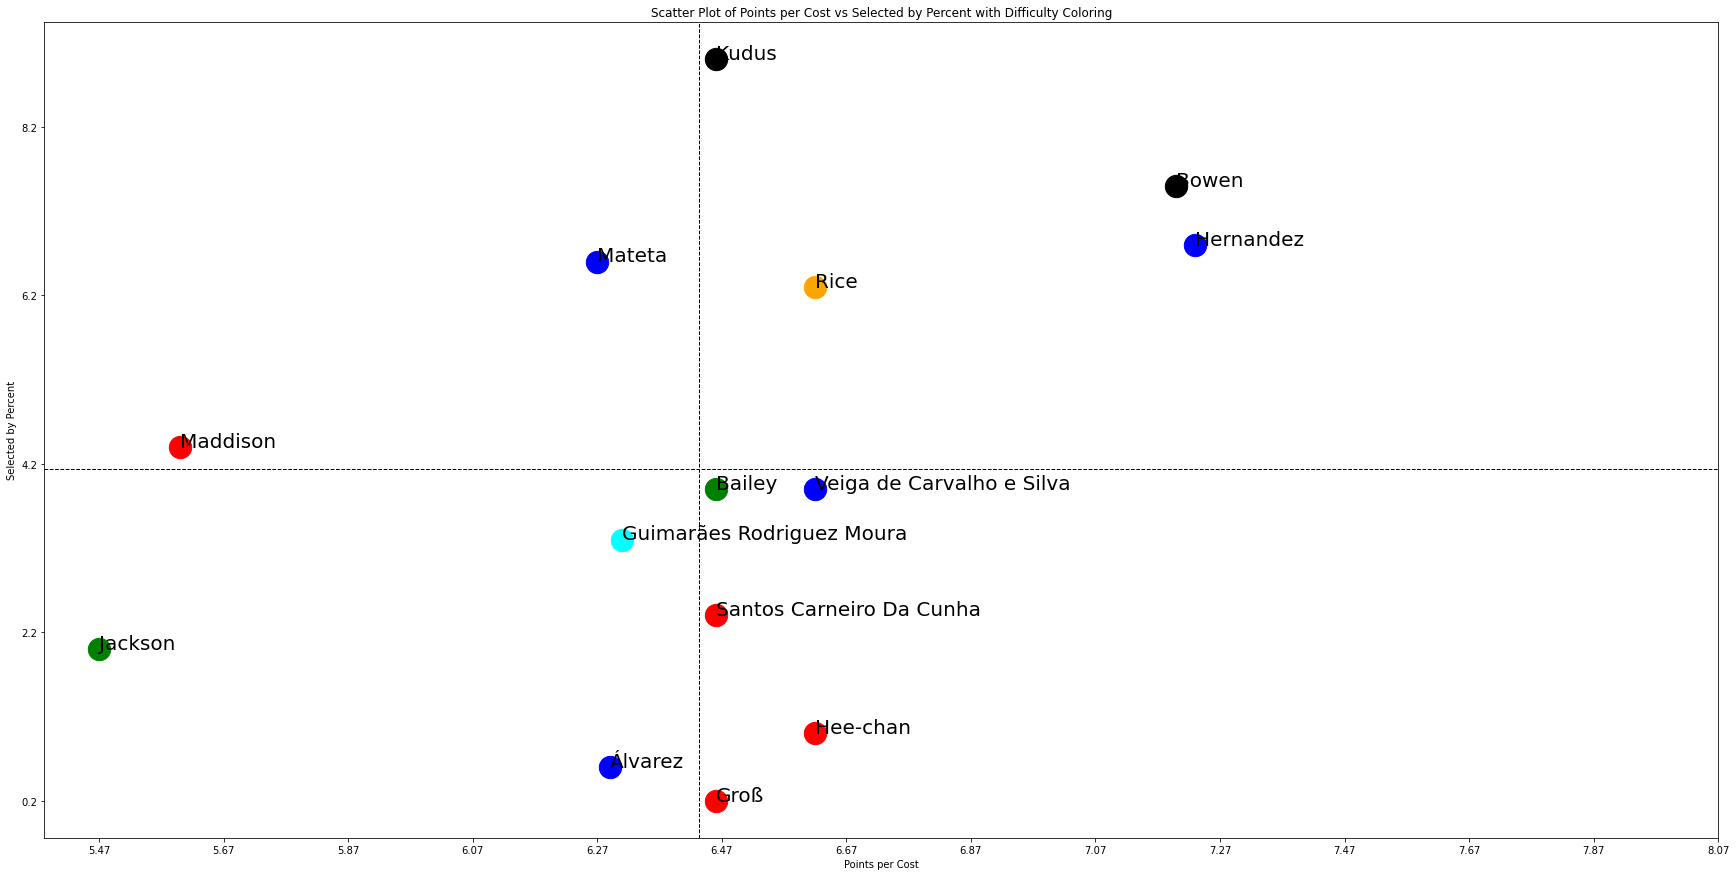

In [23]:
# Create a color map based on the unique values in the 'difficulty' column
colors = {1.8: 'cyan', 2.0:'blue', 2.2: 'green', 2.4: 'orange', 2.6: 'red', 2.8: 'black'}

x_intersection = players['points_per_cost'].mean()
y_intersection = players['selected_by_percent'].mean()


# Plot the scatter plot
plt.figure(figsize=(30, 15))
for index, row in players.iterrows():
    plt.scatter(row['points_per_cost'], row['selected_by_percent'], color=colors[row['difficulty']], s=500)
    plt.text(row['points_per_cost'], row['selected_by_percent'], row['second_name'], fontsize=20)

# Adding labels and title
plt.xlabel('Points per Cost')
plt.ylabel('Selected by Percent')
plt.title('Scatter Plot of Points per Cost vs Selected by Percent with Difficulty Coloring')

plt.xticks(np.arange(min(players['points_per_cost']), max(players['points_per_cost'])+1, 0.2))
plt.yticks(np.arange(min(players['selected_by_percent']), max(players['selected_by_percent'])+1, 2))

# Draw vertical and horizontal lines to divide the plot into four quadrants
plt.axhline(y=y_intersection, color='black', linestyle='--', linewidth=1)
plt.axvline(x=x_intersection, color='black', linestyle='--', linewidth=1)

# Show the plot
plt.show()